In [13]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [14]:
if not os.path.isfile("data/Food-5k.zip"):
    ! curl -o "data/Food-5k.zip" "https://archive.org/download/food-5-k/Food-5K.zip"

#### Nota:
Siccome il link non funzionava, ho scaricato il dataset da kaggle. Questo è in forma "train - evaluate - validate", ognuno contenente due folder: una per la classe food, una per la classe non_food.

Il dataset al link, invece, aveva i dati strutturati in maniera diversa. Per questo motivo sarebbe stato necessario compiere una serie di modifiche, splittando manualmente i file.

In [15]:
train_path = "data/Food-5k/training"
val_path = "data/Food-5k/evaluation"

In [16]:
IMAGE_SIZE = [200, 200]

In [17]:
# Cerchiamo di capire quanti campioni abbiamo usando la funzione glob cercando tutti i file jpg
image_files = glob(train_path + "/*/*.jpg")
val_image_files = glob(val_path + "/*/*.jpg")

In [18]:
# Qui invece il numero di classi
folders = glob(train_path+"/*")
classes = len(folders)
folders

['data/Food-5k/training\\food', 'data/Food-5k/training\\non_food']

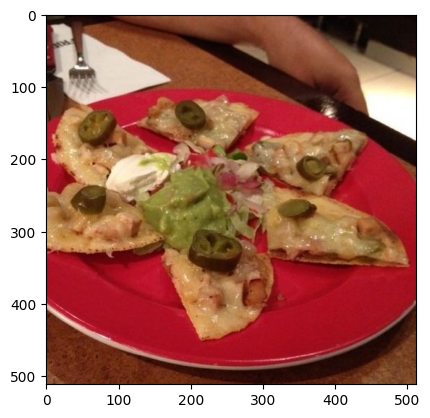

In [19]:
plt.imshow(image.load_img(np.random.choice(image_files)));

In [20]:
vgg16 = PretrainedModel(
    input_shape=IMAGE_SIZE+[3],
    weights="imagenet", # Permette di scaricare i pesi di VGG16 basato sul dataset imagenet
    include_top=False # Choppiamo via la testa della rete, tenendo solo le convoluzioni
)

In [21]:
vgg16.trainable = False

In [23]:
x = Flatten()(vgg16.output)

In [24]:
# Da qui costruiamo la nostra testa
o = Flatten()(vgg16.output)

In [25]:
model = Model(inputs=vgg16.input, outputs=o)

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18432)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
# No Data Augmentation
gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [33]:
batch_size = 128

train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="binary" # Forza a non usare 1hot encoding ma 0/1. Possibile usare "sparse" per ottenere la classe a numero, come nella multiclass
)

Found 3000 images belonging to 2 classes.


In [34]:
val_generator = gen.flow_from_directory(
    val_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="binary"
)

Found 1000 images belonging to 2 classes.


In [37]:
# Istanziamo un dataset tabellare. Questo dataset avrà x_train composto da feature vector in uscita dal flatten.

n_train = len(image_files)
n_val = len(val_image_files)

# Calcoliamo la dimensione di output del nostro modello. La size dell'array in input è (1, 200, 200, 3)
feat = model.predict(np.random.random([1] + IMAGE_SIZE + [3]))
D = feat.shape[1] # Calcoliamo la shape della seconda dimensione

x_train = np.zeros((n_train, D))
y_train = np.zeros(n_train)
x_val = np.zeros((n_val, D))
y_val = np.zeros(n_val)

# Popoliamo il dataset adesso
i = 0
for x, y in train_generator:
    # Otteniamo le feature
    feats = model.predict(x)
    # Calcoliamo la size, che potrebbe non essere sempre la batch size, specie se siamo a fine corsa
    sz = len(y)
    # popoliamo
    x_train[i:i+sz] = feats
    y_train[i:i+sz] = y

    i += sz
    # Nota bene: i generator vanno in loop infinito. Per questo motivo dobbiamo essere noi a rompere il ciclo for
    if i >= n_train:
        print("breaking at:", i)
        break

i = 0
for x, y in val_generator:
    # Otteniamo le feature
    feats = model.predict(x)
    # Calcoliamo la size, che potrebbe non essere sempre la batch size, specie se siamo a fine corsa
    sz = len(y)
    # popoliamo
    x_val[i:i+sz] = feats
    y_val[i:i+sz] = y

    i += sz
    if i >= n_val:
        print("breaking at:", i)
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
breaking at: 3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━

In [39]:
# Notiamo come x_train ha un minimo pari a 0, e ce lo aspettiamo dalla ReLU. Ma il massimo è molto elevato
x_train.max(), x_train.min() 

(641.5072631835938, 0.0)

In [40]:
# Facciamo scaling
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [42]:
# Usicamo la logistic regression di sklearn per gioco!
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)
print(logreg.score(x_train_scaled, y_train))
print(logreg.score(x_val_scaled, y_val))

1.0
0.983


In [53]:
# Adesso in tensorflow:
i = Input(shape=(D,))
o = Dense(8, activation="relu")(i)
o = Dense(1, activation="sigmoid")(o)
logreg2 = Model(i, o)
logreg2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [54]:
r = logreg2.fit(
    x_train_scaled,
    y_train,
    validation_data=(x_val_scaled, y_val),
    batch_size=128,
    epochs=10
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8595 - loss: 0.2857 - val_accuracy: 0.9760 - val_loss: 0.0689
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9998 - loss: 0.0107 - val_accuracy: 0.9800 - val_loss: 0.0611
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9988 - loss: 0.0066 - val_accuracy: 0.9800 - val_loss: 0.0638
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9998 - loss: 0.0046 - val_accuracy: 0.9810 - val_loss: 0.0652
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9999 - loss: 0.0029 - val_accuracy: 0.9800 - val_loss: 0.0662
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9800 - val_loss: 0.0668
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9800 - val_loss: 0.0677
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 0.9800 - val_los

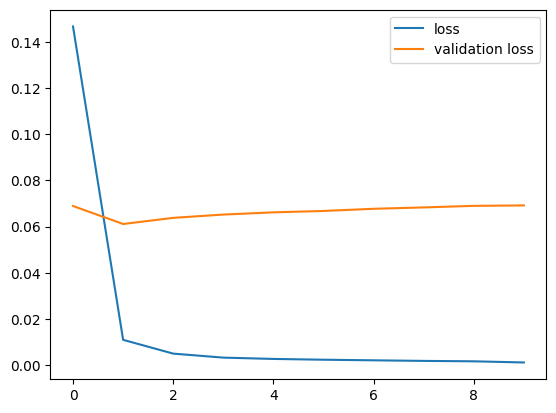

In [55]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

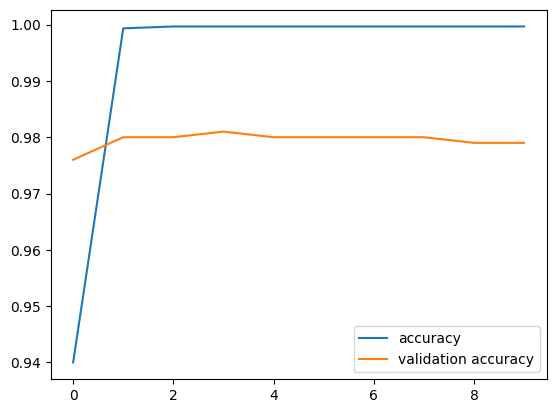

In [56]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()